##### **Objective**: Gain key Statistical Insight into `Medical Device Failure`


##### **Key Business Questions**

- What's the Proportion of Device Failure ?

- Of all 4 `gear_types` which has the minimum and maximum `Wear_Measure`?

- What's the average `velocity` and `Torque` for all 4 gear types?

- There's a no statistical difference in the average `velocity` of `gear_types` `T`,`X`, `Y`,`Z`, can you confirm this hypothesis?
    - Consider a 5% significance level for the analysis

- Build a statistical model to determine the probability of `device failure`


In [1]:
#import pandas package

import pandas as pd # data  loading, manipulation and wrangling
pd.set_option('display.max_rows', None) # display all rows in the dataset
pd.set_option('display.max_columns', None) # display all columns in the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x) # suppress all scientific notations and round to 2 decimal places
import numpy as np

#Visualization
import plotly.express as px #interactive visualization
import seaborn as sns # statistical visualization
#SNS Settings
sns.set(color_codes = True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette("Set3")
import matplotlib.pyplot as plt # basic visualization
# Command to tell Python to actually display the graphs
%matplotlib inline

# statistical Analysis library
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings(action='ignore', category=DeprecationWarning)




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrices

#SNS Settings
sns.set(color_codes = True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette("Set3")

!pip install statsmodels
import statsmodels.formula.api as smf

# Import Data Set
import time
time_begin = time.time()

In [2]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_main = pd.read_csv("/content/drive/MyDrive/Previous_Projects/medical_device_failure.csv")

# copying data to another variable to avoid any changes to original data
data = df_main.copy()

data.sample(5)

,Device_Fail,Gear_Type,Velocity,Torque(Nm),Wear_Measure,Sensor_1,Sensor_2
1171,N,Z,1371.00,55.50,159.00,299.10,323.37
2764,N,T,1816.00,24.50,7.00,301.10,335.22
8467,N,Z,1693.00,28.00,188.00,297.20,322.63
9352,N,Y,1445.00,48.00,73.00,298.10,320.41
4987,N,X,1755.00,26.90,73.00,298.70,327.44


In [4]:
data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]] = data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]].fillna(data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]].median())

data.isnull().sum()

Device_Fail     0
Gear_Type       0
Velocity        0
Torque(Nm)      0
Wear_Measure    0
Sensor_1        0
Sensor_2        0
dtype: int64

### **What's the Proportion of Device Failure ?**

N    9661
Y     339
Name: Device_Fail, dtype: int64
N   0.97
Y   0.03
Name: Device_Fail, dtype: float64


<Axes: xlabel='Device_Fail', ylabel='count'>

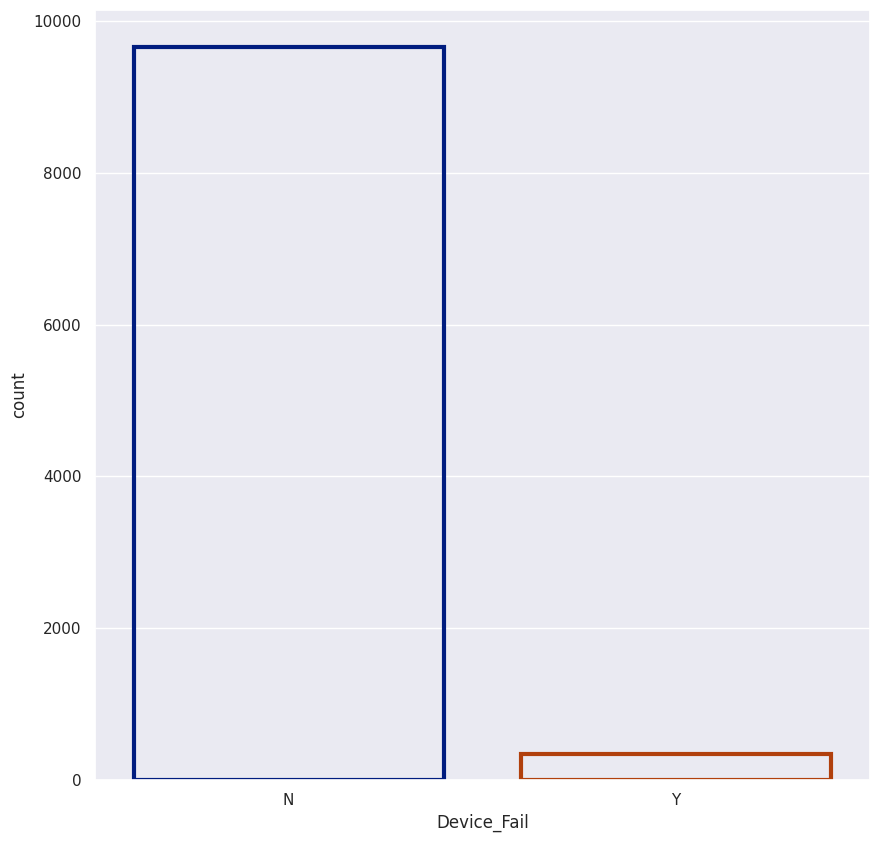

In [5]:
print(data['Device_Fail'].value_counts())
print(data['Device_Fail'].value_counts(normalize = True))

sns.countplot(x="Device_Fail",edgecolor=sns.color_palette("dark", 2),facecolor=(0,0,0,0),linewidth=3,data = data)

Observation: as expected, we have fewer instances of device failure - `3%`

#### **Of all 4 `gear_types` which has the minimum and maximum `Wear_Measure`?**

In [6]:
geartype_minmax_wear_measure = data.groupby('Gear_Type').sum()[['Wear_Measure']].sort_values('Wear_Measure',ascending = False)
geartype_minmax_wear_measure

,Wear_Measure
Gear_Type,
Z,559571.00
Y,321634.00
X,107742.00
T,91126.00


<Figure size 1400x800 with 0 Axes>

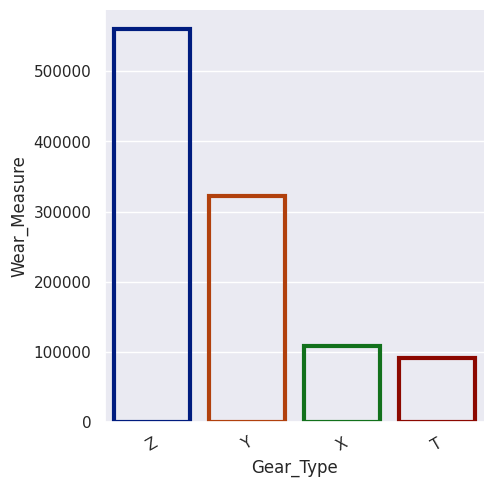

In [7]:
plt.figure(figsize=(14,8))
sns.catplot(data=geartype_minmax_wear_measure,x= 'Gear_Type', y='Wear_Measure', kind='bar',edgecolor=sns.color_palette("dark", 5),facecolor=(0,0,0,0),linewidth=3);
plt.xticks(rotation=30);

`Gear_Type` `Z` with`~56K` has the highest wear_measure whereas `T` has the least wear measure with `~91K`

##### **What's the average `velocity` and `Torque` for all 4 gear types?**

In [8]:
geartype_avg_velocity = data.groupby('Gear_Type').mean()[['Velocity']].sort_values('Velocity',ascending = False)
geartype_avg_velocity

,Velocity
Gear_Type,
Z,1540.12
X,1538.27
Y,1537.55
T,1534.30


<Figure size 1400x800 with 0 Axes>

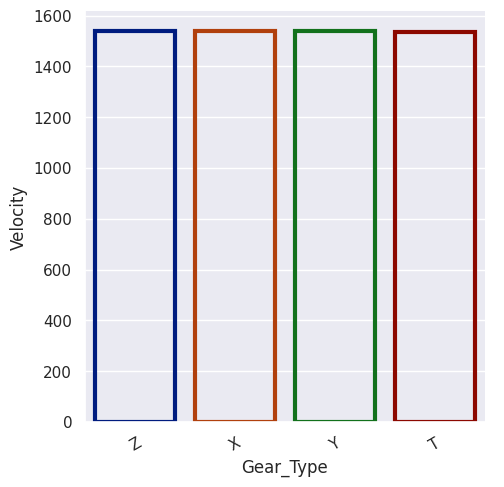

In [9]:
plt.figure(figsize=(14,8))
sns.catplot(data=geartype_avg_velocity,x= 'Gear_Type', y='Velocity', kind='bar',edgecolor=sns.color_palette("dark", 5),facecolor=(0,0,0,0),linewidth=3);
plt.xticks(rotation=30);

*Observation :* Average velocity of all gear_types is `~1500`

In [10]:
geartype_avg_torque = data.groupby('Gear_Type').mean()[['Torque(Nm)']].sort_values('Torque(Nm)',ascending = False)
geartype_avg_torque

,Torque(Nm)
Gear_Type,
T,40.37
Y,40.02
Z,39.94
X,39.84


<Figure size 1400x800 with 0 Axes>

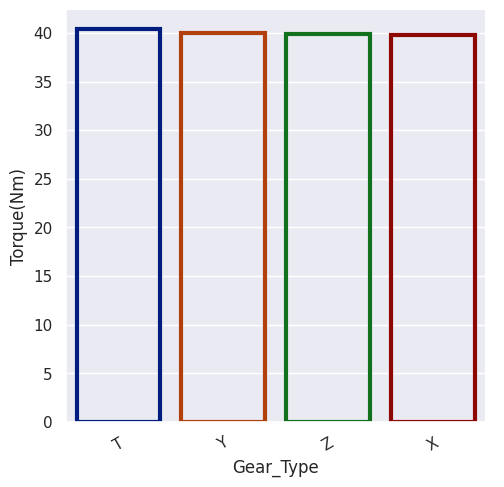

In [11]:
plt.figure(figsize=(14,8))
sns.catplot(data=geartype_avg_torque,x= 'Gear_Type', y='Torque(Nm)', kind='bar',edgecolor=sns.color_palette("dark", 5),facecolor=(0,0,0,0),linewidth=3);
plt.xticks(rotation=30);

*Observation :* Average Torque of all gear_types is `~40`

#### **There's a no statistical difference in the average `velocity` of `gear_types` `T`,`X`, `Y`,`Z`, can you confirm this hypothesis ?**

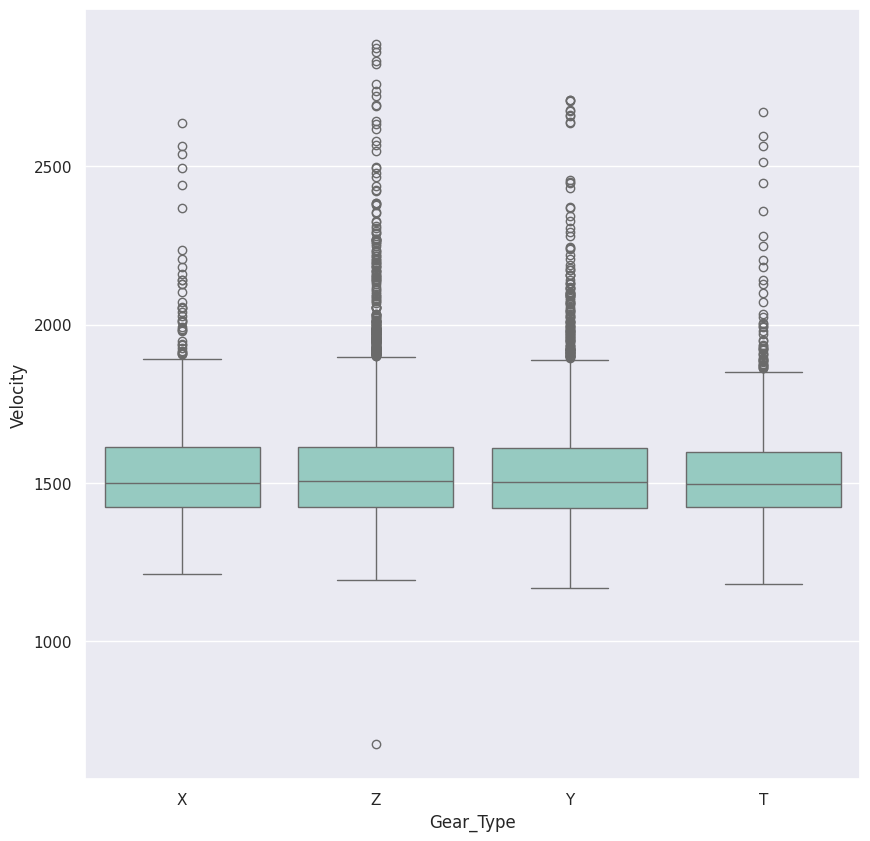

In [12]:
# visual analysis of the velocity for the 4 Gear_Type
sns.boxplot(x="Gear_Type", y="Velocity", data = data)
plt.show()

### **Hypothesis Testing**

### **Step 1: Define null and alternative hypotheses**

The null and alternative hypotheses can be formulated as:

**H0**: The average `velocity` with respect to `gear_types` is equal.

**Ha** : At least one of the average `velocity` with respect to the four `gear_types` is different.

Null hyp: `mean T` = `mean Y` = `mean Z` = `mean X`

Alt hyp:`mean T` = `mean Y` = `mean Z` =`mean X`

### **Step 2: Select Appropriate test**

This is a problem concerning four population means. `Kruskal Wallis` is the appropriate test.

### Step 3: Decide the significance level


As given in the problem statement, we select $\alpha = 0.05$

### Step 4: Collect and prepare data

In [13]:

gear_velocity_T = data[data['Gear_Type']=='T']['Velocity']
gear_velocity_X = data[data['Gear_Type']=='X']['Velocity']
gear_velocity_Y = data[data['Gear_Type']=='Y']['Velocity']
gear_velocity_Z = data[data['Gear_Type']=='Z']['Velocity']

### Step 5: Calculate the p-value

- We will use the kruskal() function from the scipy.stats library to perform a kruskal test.

- The `kruskal()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test.

- The sample observations are the values of `velocity` with respect to the four `gear_type`.

In [14]:
# find the p-value
test_stat, p_value = stats.kruskal(gear_velocity_T, gear_velocity_X,gear_velocity_Y,gear_velocity_Z)
print(p_value)

0.5898042983024101


### Step 6: Compare the p-value with $\alpha$

In [15]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.5898042983024101 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is  greater than the level of significance `5%`, we fail to reject the null hypothesis. Hence, we don't have enough statistical evidence to say that at least one of the average `velocity` with respect to the 4 `gear_type` is different.

### **Are `Gear_Type` and `Device Failure` independent of each other ?**

**Hypothesis Test : Chisquare Test of Independence**

In [16]:
data.columns

Index(['Device_Fail', 'Gear_Type', 'Velocity', 'Torque(Nm)', 'Wear_Measure',
       'Sensor_1', 'Sensor_2'],
      dtype='object')


In order to conduct the χ2 independence test, we follow the step-wise implementation procedure for hypothesis testing.

- State the null hypothesis H0 and alternative hypothesis HA.

 - `H0`:No association between `Gear_Type` and `Device_Fail`
 - `HA`:There is an association between `Gear_Type` and `Device_Fail`

- Decide on the significance level,α.
- Compute the value of the test statistic.
- Determine the p-value.
- If p ≤ α,
 reject H0; otherwise, do not reject H0.

- Interpret the result of the hypothesis test.









In [17]:
contigency = pd.crosstab(data['Device_Fail'],data['Gear_Type'])
contigency

Gear_Type,T,X,Y,Z
Device_Fail,,,,
N,809,982,2914,4956
Y,28,21,83,207


<Axes: xlabel='Gear_Type', ylabel='Device_Fail'>

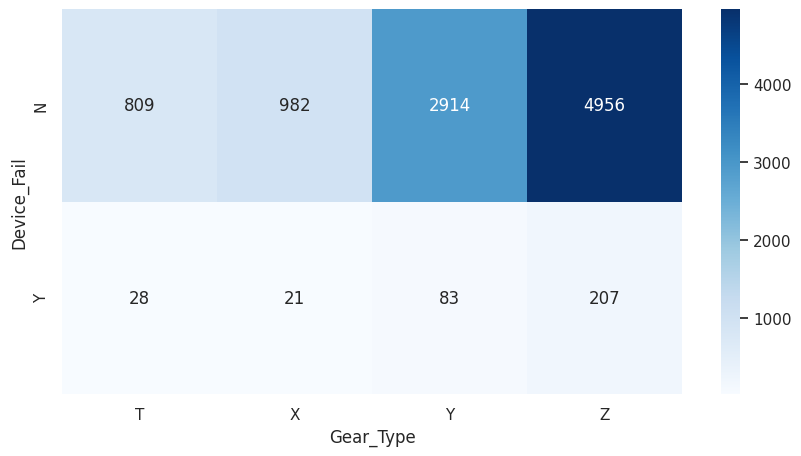

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(contigency, annot=True, cmap='Blues', fmt='g')

In [19]:
from scipy.stats import chi2_contingency

In [20]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
# Print the p-value
print(p)

0.0020709335029728063


**Inference**

The p-value is `0.00207` which means that we reject the null hypothesis at `95%` level of confidence. The null hypothesis was that `Gear_Type` and `Device_Fail` are independent. In this example, the contingency table was `2×4`.

### Build a statistical model to determine the odd ratio of device failure

In [21]:
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

In [22]:
data['Device_Fail']= data['Device_Fail'].map({'Y': 1, 'N': 0})
data['Device_Fail'].unique()

array([0, 1])

In [23]:
log_reg = smf.logit("Device_Fail ~ Velocity + Gear_Type +Wear_Measure + Sensor_1 + Sensor_2", data=data).fit()
# Summary of results
print(log_reg.summary())
# Inspect paramaters
print(log_reg.params)

Optimization terminated successfully.
         Current function value: 0.134212
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            Device_Fail   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                 0.09346
Time:                        06:18:01   Log-Likelihood:                -1342.1
converged:                       True   LL-Null:                       -1480.5
Covariance Type:            nonrobust   LLR p-value:                 5.630e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -137.2104     12.623    -10.870      0.000    -161.951    -112.470
Gear_Type[T.X]   

#####**Calculating Odds Ratios**

- After fitting a Logistic Regression, we'll likely want to calculate the Odds Ratios of the estimated parameters.

In [24]:
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

                 OR  Lower CI  Upper CI
Intercept      0.00      0.00      0.00
Gear_Type[T.X] 0.65      0.36      1.15
Gear_Type[T.Y] 0.83      0.53      1.29
Gear_Type[T.Z] 1.20      0.80      1.81
Velocity       1.00      1.00      1.00
Wear_Measure   1.01      1.01      1.01
Sensor_1       1.89      1.67      2.13
Sensor_2       0.84      0.81      0.88


##### interpretation

 - Reporting only variables that are statistically significant (`P>|z| less than 0.05`)

`Wear_Measure` : Each additional `wear_measure` makes this device `1.01` times more likely to suffer a failure

`Velocity` : Each additional `Velocity` makes this device `1.00` times more likely to suffer a failure

`Sensor_1` and `Sensor_2` : the odds this device failing increases by `89%` and  decreases by`16%` for both sensors respectively.
